### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import time 

import matplotlib.pyplot as plt

# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from textwrap import wrap

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
RANDOM_SEED = 25


columns = ['Radius','Texture','Perimeter','Area','Smoothness','Compactness',
           'Concavity','Concave_Points','Symmetry','Fractal_Dimension',
           'Malignant/Benign']

# Read CSV file into pandas df
df = pd.read_csv('../datasets/breast_cancer/breast-cancer-wisconsin.csv',
                 delimiter=',', quotechar='"', names=columns)

### Dataframe without Preprocessing 

In [4]:
print("Printing dataframe head (without any preprocessing)....")
print(df.head(10))

Printing dataframe head (without any preprocessing)....
    Radius  Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
0  1000025        5          1     1           1            2         1   
1  1002945        5          4     4           5            7        10   
2  1015425        3          1     1           1            2         2   
3  1016277        6          8     8           1            3         4   
4  1017023        4          1     1           3            2         1   
5  1017122        8         10    10           8            7        10   
6  1018099        1          1     1           1            2        10   
7  1018561        2          1     2           1            2         1   
8  1033078        2          1     1           1            2         1   
9  1033078        4          2     1           1            2         1   

   Concave_Points  Symmetry  Fractal_Dimension  Malignant/Benign  
0               3         1                  1     

### Dataset Preprocessing 

In [5]:
# Shuffle
df = shuffle(df, random_state=RANDOM_SEED)

# DROP USELESS ROWS AND COLUMNS
df.dropna(inplace=True)
cols = [0]
# Drop ID column (it's not attribute or target)
df.drop(df.columns[cols],axis=1,inplace=True)
# Drop all data points with missing variables  (denoted by '?' entry)
nostrings_row_list = [x.isdigit() for x in df.iloc[:,5]]
df = df[nostrings_row_list]


# Handle categorical data
# df = pd.get_dummies(df)


# Split data into X and y vectors
X = df.ix[:, df.columns != 'Malignant/Benign']
y = df['Malignant/Benign']

# Change 2 -> 0 (benign) and 4 -> 1 (malignant)
y.replace(2, 0, inplace=True)
y.replace(4, 1, inplace=True)

/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### Sanity Check on Dataframe 


In [6]:
print("Sanity Check: Printing out dataframe and shape after preprocessing... ")
print(df.head(10))
print("df.shape: ", df.shape)


Sanity Check: Printing out dataframe and shape after preprocessing... 
     Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
437        4          1     1           1            2         1   
511        5          1     1           1            2         1   
215        8          7     8           7            5         5   
684        1          1     1           1            2         1   
302       10         10    10           7            9        10   
341        1          1     1           1            2         1   
608        5         10    10          10           10        10   
366        6         10    10          10            8        10   
205        5         10    10           9            6        10   
270        8          4     7           1            3        10   

     Concave_Points  Symmetry  Fractal_Dimension  Malignant/Benign  
437               1         1                  1                 0  
511               2         1             

### Training and Testing Split, Scaling 

In [ ]:
# # Split into 30%  training data, 70% testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.30, random_state=RANDOM_SEED)


# # Apply scaling. Large values of certain features undesireable for NN
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### Sanity Check on X_train

In [ ]:
# print("Sanity Check: Printing out X_train... ")
# print(X_train[:4])
# print("X_train.shape: ", X_train.shape)
# print("X_test.shape: ", X_test.shape)
# print("y_train.shape: ", y_train.shape)
# print("y_test.shape: ", y_test.shape)

### Run kMeans Experiments, varying k

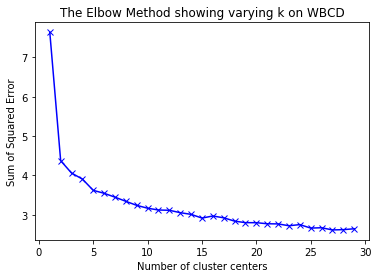

Error:  156.3103953147877
Cluster centers:  [[ 3.94387755  1.1377551   1.26530612  1.06632653  1.98469388  1.16326531
   1.9744898   1.10204082  1.01020408]
 [ 8.75       10.          9.66666667  8.75        6.33333333  9.25
   8.58333333  8.16666667  1.41666667]
 [ 8.4         9.          9.          1.6         4.6         3.6
   3.2         7.8         1.        ]
 [ 8.72727273  5.72727273  5.90909091  3.63636364  4.22727273  9.36363636
   6.59090909  8.13636364  1.81818182]
 [ 7.25        8.125       5.625       2.5         7.375       3.
   4.375      10.          3.375     ]
 [ 4.44444444  4.88888889  4.55555556  8.33333333  4.         10.
   4.88888889  3.          1.44444444]
 [ 4.5         6.          7.08333333  8.83333333  7.75        9.5
   5.33333333  8.          3.83333333]
 [ 6.2        10.          9.6         8.          8.4         9.8
   8.8         2.8         5.4       ]
 [ 6.          3.          3.6         1.75        2.9         2.2
   3.75        2.05        1

In [11]:
# Hyperparameters 

# Vary this as needed 
init_method = "k-means++"
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1





# k means determine k
distortions = []
K = range(1,31)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    clf_kMeans = KMeans(n_clusters=k, random_state=0)
    clf_kMeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing varying k on WBCD')
plt.xlabel('Number of cluster centers')
plt.ylabel('Sum of Squared Error')
plt.show()





error = mean_squared_error(y, clf_kMeans.predict(X))
# test_err = mean_squared_error(y_test,
#                                     clf.predict(X_test))

print("Error: ", error)
print("Cluster centers: ", clf_kMeans.cluster_centers_)


# # Plot results
# print 'plotting results'
# plt.figure()
# title = 'Census Income kNN: Performance'
# plt.title('\n'.join(wrap(title,60)))
# plt.plot(ks, test_err, '-', label='test error')
# plt.plot(ks, train_err, '-', label='train error')
# plt.legend()
# plt.xlabel('Num Estimators')
# plt.ylabel('Mean Square Error')
# plt.savefig('plots/CensusIncome/kNN/zeroes_and_one/censusIncome_kNN.png')
# print 'plot complete'
# ### ---

### Run kMeans Experiments (Vary init_method) 

Running kMeans for k = 1  and init_method: k-means++
Running kMeans for k = 2  and init_method: k-means++
Running kMeans for k = 3  and init_method: k-means++
Running kMeans for k = 4  and init_method: k-means++
Running kMeans for k = 5  and init_method: k-means++
Running kMeans for k = 6  and init_method: k-means++
Running kMeans for k = 7  and init_method: k-means++
Running kMeans for k = 8  and init_method: k-means++
Running kMeans for k = 9  and init_method: k-means++
Running kMeans for k = 10  and init_method: k-means++
Running kMeans for k = 11  and init_method: k-means++
Running kMeans for k = 12  and init_method: k-means++
Running kMeans for k = 13  and init_method: k-means++
Running kMeans for k = 14  and init_method: k-means++
Running kMeans for k = 15  and init_method: k-means++
Running kMeans for k = 16  and init_method: k-means++
Running kMeans for k = 17  and init_method: k-means++
Running kMeans for k = 18  and init_method: k-means++
Running kMeans for k = 19  and init_m

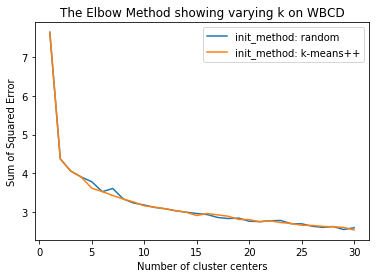

In [14]:
# Hyperparameters 

init_methods = ["k-means++", "random"]
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1


distortions_random = []
distortions_kplus = []

K = range(1,31)

for init_method in init_methods: 
    for k in K:
        print("Running kMeans for k =", k, " and init_method:", init_method)
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)

    #     clf_kMeans = KMeans(n_clusters=k, random_state=0)
        clf_kMeans = KMeans(n_clusters=k, init=init_method)
        clf_kMeans.fit(X)
        distortion = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
        
        if init_method == "random": 
            distortions_random.append(distortion)
        
        elif init_method == "k-means++": 
            distortions_kplus.append(distortion)
            

    
# Plot the elbow

plt.plot(K, distortions_random, '-', label='init_method: random')
plt.plot(K, distortions_kplus, '-', label='init_method: k-means++')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing varying k on WBCD')
plt.xlabel('Number of cluster centers')
plt.ylabel('Sum of Squared Error')
plt.legend()
plt.show()


# # Plot results
# print 'plotting results'
# plt.figure()
# title = 'Census Income kNN: Performance'
# plt.title('\n'.join(wrap(title,60)))
# plt.plot(ks, test_err, '-', label='test error')
# plt.plot(ks, train_err, '-', label='train error')
# plt.legend()
# plt.xlabel('Num Estimators')
# plt.ylabel('Mean Square Error')
# plt.savefig('plots/CensusIncome/kNN/zeroes_and_one/censusIncome_kNN.png')
# print 'plot complete'
# ### ---

### Run kMeans Experiments (Vary init_method, keep k constant) 

Running kMeans for max_iter = 100  and init_method: k-means++
Running kMeans for max_iter = 120  and init_method: k-means++
Running kMeans for max_iter = 140  and init_method: k-means++
Running kMeans for max_iter = 160  and init_method: k-means++
Running kMeans for max_iter = 180  and init_method: k-means++
Running kMeans for max_iter = 200  and init_method: k-means++
Running kMeans for max_iter = 220  and init_method: k-means++
Running kMeans for max_iter = 240  and init_method: k-means++
Running kMeans for max_iter = 260  and init_method: k-means++
Running kMeans for max_iter = 280  and init_method: k-means++
Running kMeans for max_iter = 300  and init_method: k-means++
Running kMeans for max_iter = 320  and init_method: k-means++
Running kMeans for max_iter = 340  and init_method: k-means++
Running kMeans for max_iter = 360  and init_method: k-means++
Running kMeans for max_iter = 380  and init_method: k-means++
Running kMeans for max_iter = 400  and init_method: k-means++
Running 

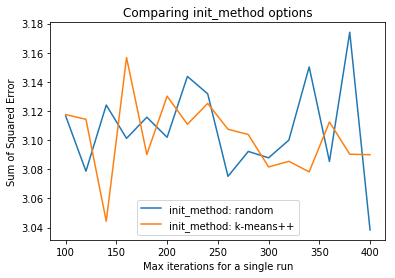

In [15]:
# Hyperparameters 

init_methods = ["k-means++", "random"]
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1


distortions_random = []
distortions_kplus = []

# Fix k 
k = 12 

# Select range of max_iterations
max_iterations = range(100, 420, 20)


for init_method in init_methods: `
    for max_iter in max_iterations: 
        print("Running kMeans for max_iter =", max_iter, " and init_method:", init_method)
        kmeanModel = KMeans(n_clusters=k, init = init_method, max_iter=max_iter).fit(X)
        kmeanModel.fit(X)

    #     clf_kMeans = KMeans(n_clusters=k, random_state=0)
        clf_kMeans = KMeans(n_clusters=k)
        clf_kMeans.fit(X)
        distortion = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]

        if init_method == "random": 
            distortions_random.append(distortion)

        elif init_method == "k-means++": 
            distortions_kplus.append(distortion)


    
# Plot the elbow

plt.plot(max_iterations, distortions_random, '-', label='init_method: random')
plt.plot(max_iterations, distortions_kplus, '-', label='init_method: k-means++')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Comparing init_method options')
plt.xlabel('Max iterations for a single run')
plt.ylabel('Sum of Squared Error')
plt.legend()
plt.show()


# # Plot results
# print 'plotting results'
# plt.figure()
# title = 'Census Income kNN: Performance'
# plt.title('\n'.join(wrap(title,60)))
# plt.plot(ks, test_err, '-', label='test error')
# plt.plot(ks, train_err, '-', label='train error')
# plt.legend()
# plt.xlabel('Num Estimators')
# plt.ylabel('Mean Square Error')
# plt.savefig('plots/CensusIncome/kNN/zeroes_and_one/censusIncome_kNN.png')
# print 'plot complete'
# ### ---

### Compare Numerical values from graph obtained above

In [18]:
print("Min error for random: ", min(distortions_random))
print("Average error for random: ", np.mean(distortions_random))

print("Min error for k-means++: ", min(distortions_kplus))
print("Average error for k-means++: ", np.mean(distortions_kplus))


Min error for random:  3.038390195307197
Average error for random:  3.107313875324227
Min error for k-means++:  3.044340413449968
Average error for k-means++:  3.1024186001166267


### Run Expectation Maximization Experiments 

Running EM for k = 1  and cov: full
Running EM for k = 2  and cov: full
Running EM for k = 3  and cov: full
Running EM for k = 4  and cov: full
Running EM for k = 5  and cov: full
Running EM for k = 6  and cov: full
Running EM for k = 7  and cov: full
Running EM for k = 8  and cov: full
Running EM for k = 9  and cov: full
Running EM for k = 10  and cov: full
Running EM for k = 11  and cov: full
Running EM for k = 12  and cov: full
Running EM for k = 13  and cov: full
Running EM for k = 14  and cov: full
Running EM for k = 15  and cov: full
Running EM for k = 16  and cov: full
Running EM for k = 17  and cov: full
Running EM for k = 18  and cov: full
Running EM for k = 19  and cov: full
Running EM for k = 20  and cov: full
Running EM for k = 21  and cov: full
Running EM for k = 22  and cov: full
Running EM for k = 23  and cov: full
Running EM for k = 24  and cov: full
Running EM for k = 25  and cov: full
Running EM for k = 26  and cov: full
Running EM for k = 27  and cov: full
Running EM

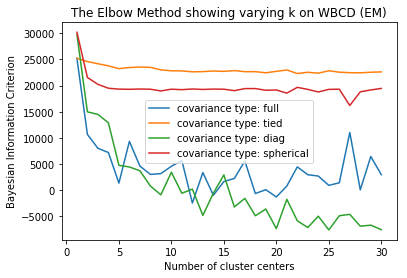

In [21]:
# Hyperparameters 

init_method = "k-means++"
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1

covariance_types = ['full','tied','diag','spherical']


# Hyperparameters 

# Vary this as needed 
init_method = "k-means++"
# Number of times to run algo with different centroid seeds 
n_init = 1
max_iter = 10 
# Runs each of the n_inits in parallel using specified number of threads
n_jobs = 1


distortions_full = []
distortions_tied = []
distortions_diag = []
distortions_spherical = []


covariance_types = ['full','tied','diag','spherical']

K = range(1,31)

for cov in covariance_types: 
    for k in K:
        print("Running EM for k =", k, " and cov:", cov)
        
        kmeanModel = GaussianMixture(n_components=k,covariance_type=cov)
        kmeanModel.fit(X)

        if cov == 'full': 
            distortions_full.append(kmeanModel.bic(X))
        elif cov == 'tied': 
            distortions_tied.append(kmeanModel.bic(X))
        elif cov == 'diag': 
            distortions_diag.append(kmeanModel.bic(X))
        elif cov == 'spherical': 
            distortions_spherical.append(kmeanModel.bic(X))
            
        


plt.plot(K, distortions_full, '-', label='covariance type: full')
plt.plot(K, distortions_tied, '-', label='covariance type: tied')
plt.plot(K, distortions_diag, '-', label='covariance type: diag')
plt.plot(K, distortions_spherical, '-', label='covariance type: spherical')
plt.title('The Elbow Method showing varying k on WBCD (EM)')
plt.xlabel('Number of cluster centers')
plt.ylabel('Bayesian Information Criterion')
plt.legend()
plt.show()

